In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.read_csv('medical_examination.csv')
df1.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df1.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight.

In [6]:
df1['overweight']=(df1['weight']/(df1['height']/100)**2).apply (lambda x: 1 if x>25 else 0)
df1.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [7]:
df1['cholesterol']=df1['cholesterol'].apply(lambda x:0 if x==1 else 1)
df1['gluc']=df1['gluc'].apply(lambda x:0 if x==1 else 1)
df1.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0


In [8]:
df_cat=pd.melt(df1,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

In [9]:
df_cat['total']=1
df_cat=df_cat.groupby(['cardio','variable','value'],as_index=False).count()

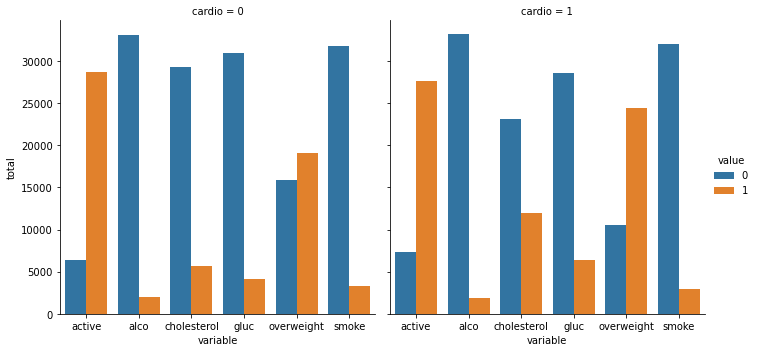

In [10]:
import seaborn as sns
fig=sns.catplot(x='variable',y='total',data=df_cat,hue='value',kind='bar',col='cardio').fig


In [11]:
df1_heat=df1[
    (df1['ap_lo'] <= df1['ap_hi'])&
    (df1['height'] >= df1['height'].quantile(0.025))&
    (df1['height'] <= df1['height'].quantile(0.975))&
    (df1['weight'] >= df1['weight'].quantile(0.025))&
    (df1['weight'] <= df1['weight'].quantile(0.975))
]

In [13]:
corr = df1_heat.corr()

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

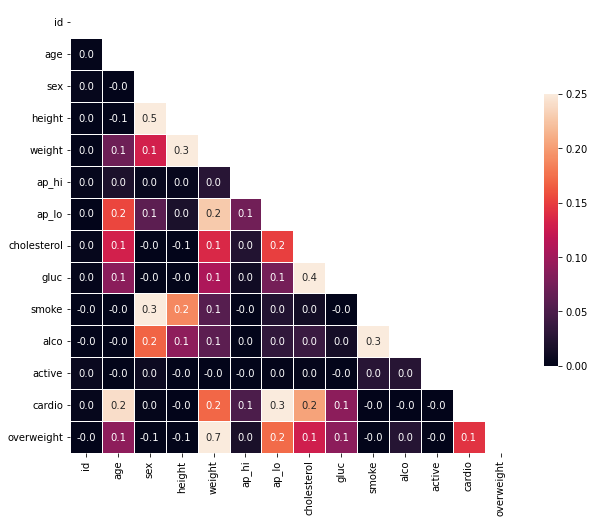

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, vmin=0, vmax=.25, square=True, cbar_kws={"shrink": .50},
                 annot=True, fmt='.1f', linewidths=.5, mask=mask)